# Project Selection

## Objective
- Identify which sensor can be eliminated to optimally reduce cost.

## Hypothesis
Eliminating the `no` sensor (Nitric Oxide) in N. Mai, Los Angeles California (CA), will have a minimal impact on overall air quality monitoring. This is based on the strong correlation, interdependence, or redundancy of `no` with other related pollutants, such as `no2` and `nox`. By leveraging data from these sensors, it can effectively infer `no` levels, thereby optimally reducing project expenses while maintaining the integrity of air quality data.

**Reference on Chosen Location ID:** https://explore.openaq.org/locations/7936

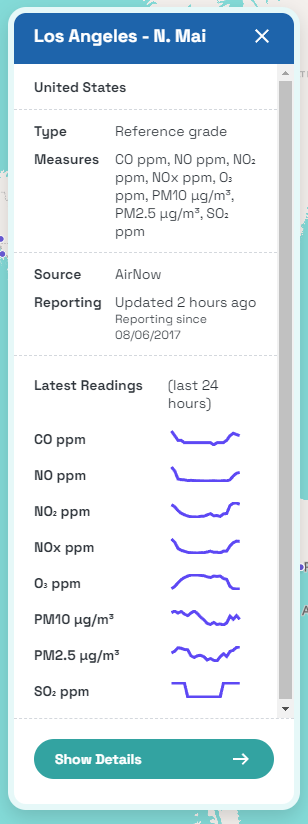

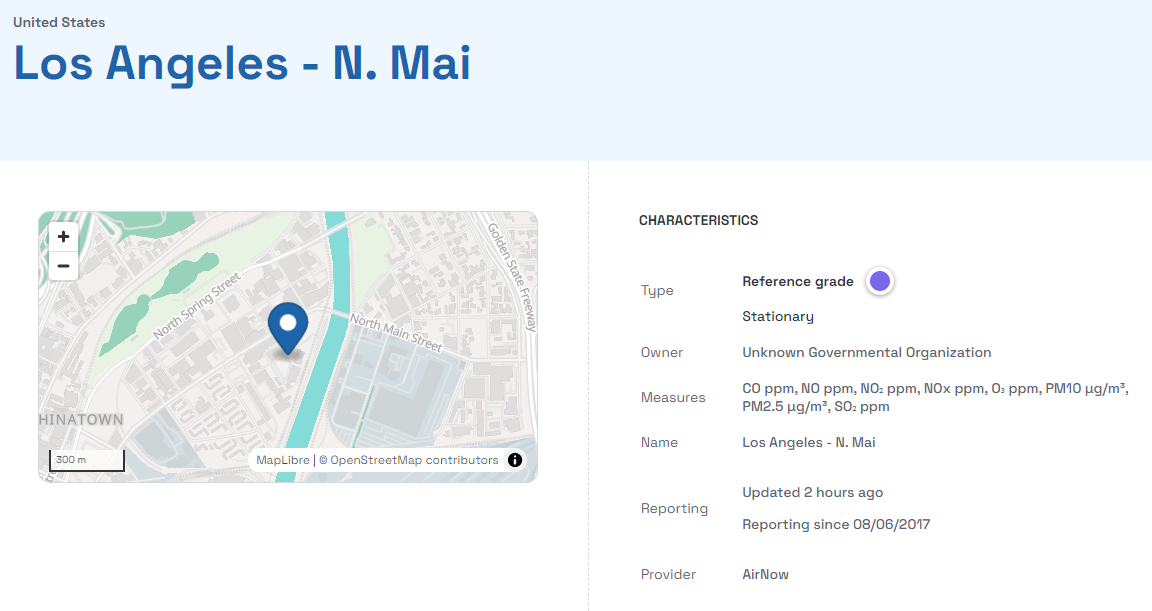

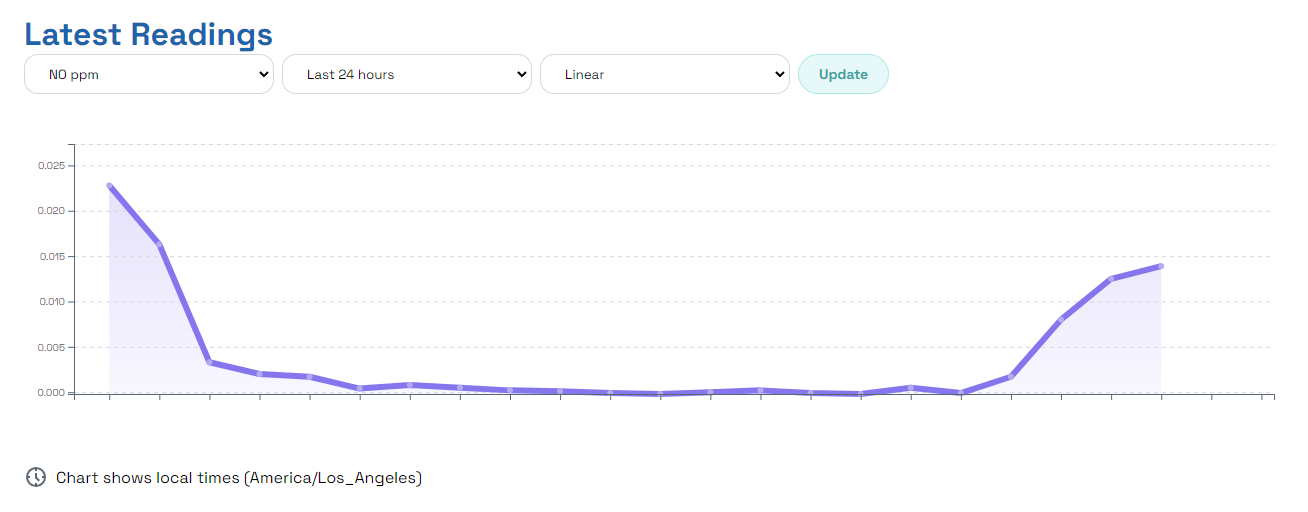

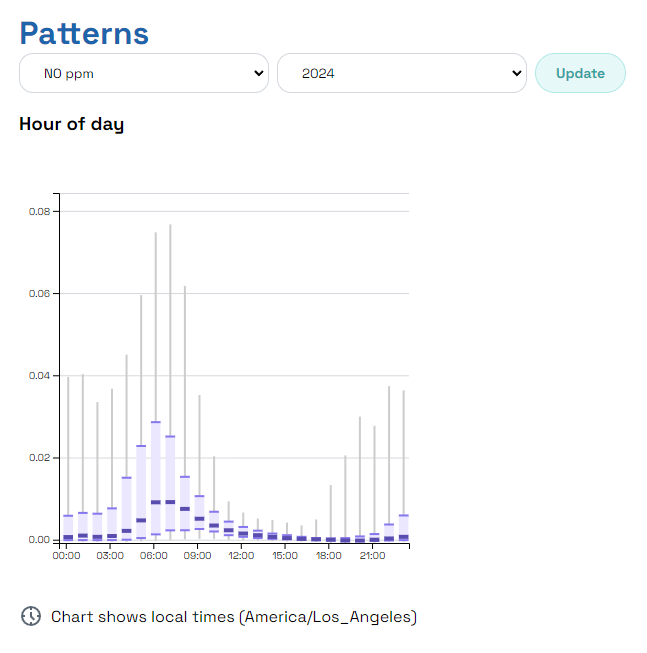

## Procedure

In [ ]:
# Installed the Spark libraries
!pip install pyspark
!pip install findspark

In [ ]:
# Installed the awscli or the AWS S3 for pulling the data from chosen location ID
!pip install awscli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [ ]:
# Imported the matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Imported the findspark
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master('local[*]') \
        .appName('ProjectSelection') \
        .getOrCreate()

print(spark.version)

3.5.3


In [ ]:
# Created a directory for the data
!mkdir raw_7936
!ls

raw_7936  sample_data


In [ ]:
# Extracted data from AWS S3 openaq-data-archive similar with previous coding exercises.
!aws s3 cp --recursive --no-sign-request s3://openaq-data-archive/records/csv.gz/locationid=7936/ raw_7936

download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170610.csv.gz to raw_7936/year=2017/month=06/location-7936-20170610.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170608.csv.gz to raw_7936/year=2017/month=06/location-7936-20170608.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170616.csv.gz to raw_7936/year=2017/month=06/location-7936-20170616.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170622.csv.gz to raw_7936/year=2017/month=06/location-7936-20170622.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170611.csv.gz to raw_7936/year=2017/month=06/location-7936-20170611.csv.gz
download: s3://openaq-data-archive/records/csv.gz/locationid=7936/year=2017/month=06/location-7936-20170621.csv.gz to ra

In [ ]:
# Defined the 7938 and displayed top 5 rows from the dataset
df_7936 = spark.read.csv('/content/raw_7936/*/*/', inferSchema=True, header=True)
df_7936.show(5)

+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|location_id|sensors_id|            location|            datetime|      lat|                lon|parameter|units|value|
+-----------+----------+--------------------+--------------------+---------+-------------------+---------+-----+-----+
|       7936|     25195|Los Angeles - N. ...|2024-10-25T01:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 30.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T02:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 31.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T03:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 22.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T04:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 28.0|
|       7936|     25195|Los Angeles - N. ...|2024-10-25T05:00:...|34.066429|-118.22675500000001|     pm10|µg/m³| 27.0|
+-----------+----------+--------------------+---

In [ ]:
# Displayed the number of rows from the dataset
df_7936.count()

298933

## Observation and Analysis

Based on my observations, the dataset contains nearly 300,000 rows `(298,933)` of air quality data collected from the location I chose which is from **"Los Angeles - N. Mai"**. Each record represents a measurement from a specific sensor, taken **hourly**. The data includes various air pollutants such as `pm10`, `pm2.5`, `so2`, `co`, `nox`, `no2`, and `o3`. Furthermore, these pollutants are critical for monitoring air quality, and the goal is to determine if the Nitric Oxide (`no`) sensor can be removed or eliminated without significantly affecting the quality of air monitoring. Since `no` is closely related to other pollutants like `no2` and `nox`, there’s a possibility that its levels can be accurately estimated using data from those sensors. This could help reduce project costs while maintaining reliable air quality data. The next steps involve analyzing the relationships between these pollutants and testing if I can predict `no` levels accurately based on other sensors in the methdology part.

## Conclusion

In summary, the dataset provides **hourly** air quality measurements, which is the optimal duration for this analysis since it ensures a high-resolution view of pollutant levels and their relationships over time. This granularity will help me accurately assess the correlation between Nitric Oxide (`no`) and other pollutants such as `no2` and `nox` since the challenge is doing the methdology as granular as possible.

I also think the hypothesis—that the `no` sensor can be eliminated while maintaining data quality—can be addressed using supervised learning techniques on this large dataset. By leveraging predictive models, I aim to estimate `no` levels based on data from other sensors, validating whether `no` measurements can be reliably inferred.

The main challenge in answering the hypothesis lies in processing and analyzing the large volume of data effectively. Ensuring the data is clean and correctly formatted for machine learning models is important. Additionally, selecting the best model to achieve high prediction accuracy could have a technical challenge for me.

The current difficulty in studying this dataset is managing its size and complexity, particularly ensuring that computational resources and data transformations align well with the requirements for effective machine learning analysis. Further, interpreting the results in a way that aligns with the project’s cost-reduction goal is another challenge to be tackled.